In [51]:
# import needed libraries for all plot and numbering stuff
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# [CONFIGS] --------------------------------------
mpl.rcParams['figure.dpi'] = 120
mpl.rcParams['text.usetex'] = False
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['mathtext.default'] = 'regular'

![](./assets/thumbnail.jpg)

# **Aufgaben 3** - *Zeitdiskrete LTI-Systeme (2)*

## Aufgabe 1

Gegeben ist ein LTI-System mit der folgenden Impulsantwort:

![alt text](https://drive.google.com/uc?id=1t7Adrnyw0efCL4wXhIPzkkAvWPhwInTY)

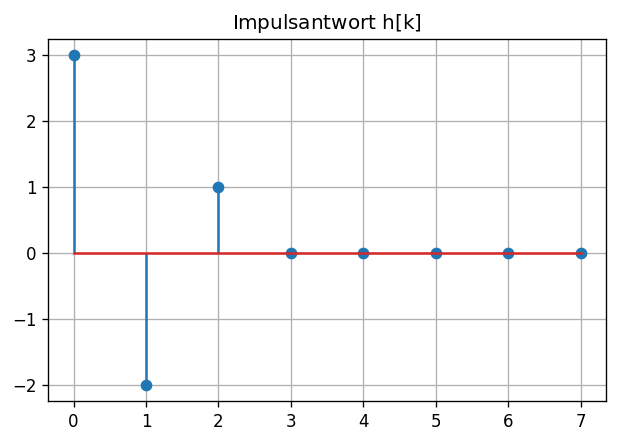

In [52]:
h = [3,-2,1,0,0,0,0,0]
plt.stem(np.arange(len(h)),h)
plt.title("Impulsantwort $h[k]$")
plt.grid(True)
plt.show()


Leiten Sie durch grafische Faltung die Antworten auf die folgenden Eingangssignale her.

> a.

![alt text](https://drive.google.com/uc?id=1-S2GpbH9F6tQf15ePjUZ2dD6EQ_5yTC8)


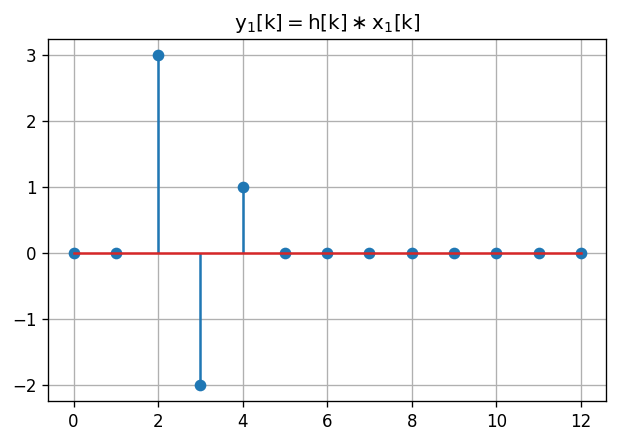

In [53]:
x_1 = [ 0, 0, 1, 0, 0, 0]
y_1 = np.convolve(x_1,h)
plt.stem(np.arange(len(y_1)),y_1)
plt.title(r"$y_1[k] = h[k] \ast x_1[k]$")
plt.grid(True)
plt.show()


> b.

![alt text](https://drive.google.com/uc?id=18dDzE1X7HkTHfCXZvby2q8vc_krOTnua)


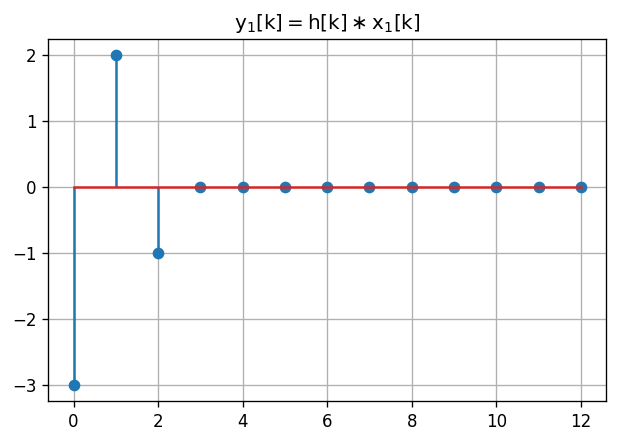

In [54]:

y_2 = np.convolve(x_2,h)
x_2 = [-1, 0, 0, 0, 0, 0]
plt.stem(np.arange(len(y_2)),y_2)
plt.title(r"$y_1[k] = h[k] \ast x_1[k]$")
plt.grid(True)
plt.show()


> c.

![alt text](https://drive.google.com/uc?id=1dgHxqKHhwoLXpjKhwiV3xFqKGPAAslJi)


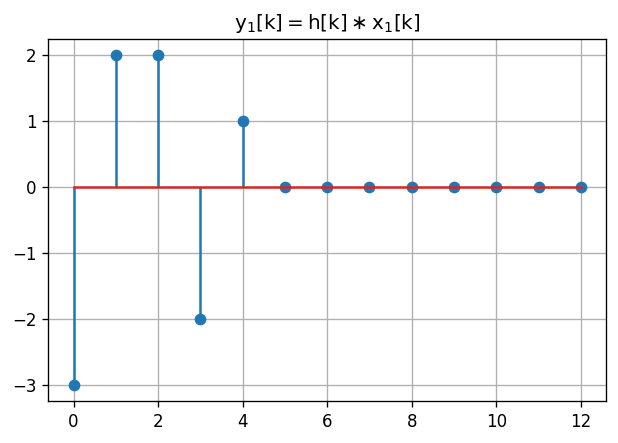

In [55]:
x_3 = [-1, 0, 1, 0, 0, 0]
y_3 = np.convolve(x_3,h)
plt.stem(np.arange(len(y_3)),y_3)
plt.title(r"$y_1[k] = h[k] \ast x_1[k]$")
plt.grid(True)
plt.show()


> d.

![alt text](https://drive.google.com/uc?id=1s6ynoCE9RtFA-S5eO_fIhvIAo4LdnVe0)

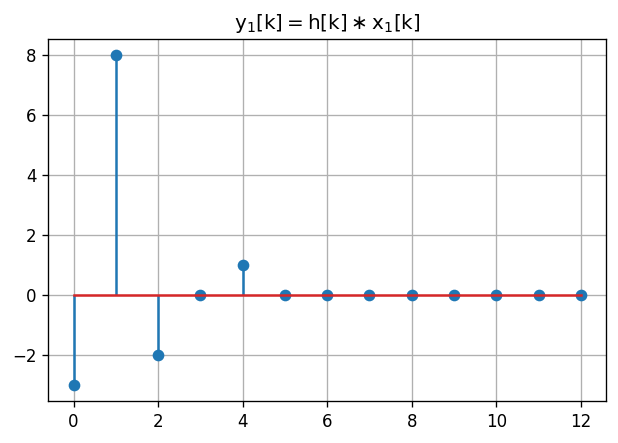

In [56]:
x_4 = [-1, 2, 1, 0, 0, 0]
y_4 = np.convolve(x_4,h)
plt.stem(np.arange(len(y_4)),y_4)
plt.title(r"$y_1[k] = h[k] \ast x_1[k]$")
plt.grid(True)
plt.show()

## Aufgabe 2

Gegeben ist das folgende Ein- und Ausgangssignalpaar eines zeitdiskreten LTI-Systems. Bestimmen Sie die Impulsantwort des Systems. (Tipp: Polynomdivision.)

![alt text](https://drive.google.com/uc?id=1K27O4atXiQjA15N0hm7FSH0kdYTzHL1i)

$$
h[k] = \delta [k] + \frac{1}{2}\cdot \delta [k-1000] 
$$

## Aufgabe 3

Gegeben ist die folgende Reihenschaltung zweier Systeme mit den Impulsantworten $h_1[k]$ und $h_2[k]$:

![alt text](https://drive.google.com/uc?id=1u3i0k5faGPtQjP_q48iuVoVZXhpUlGlr)

Gegeben $h_1[k]=a^k⋅\varepsilon[k]$, wie müsste man die Impulsantwort $h_2[k]$ wählen, damit sich die beiden Impulsantworten gerade aufheben, also $y[k]=x[k]$ gilt?

## Aufgabe 4

In der Datei `spf1e.wav` ist ein mit 8192 Hz abgetastetes Sprachsignal enthalten. Die Aufnahme wurde durch ein Echo mit einer Verzögerung von 122.1 ms (entsprechend 1000 Samples und verursacht z.B. durch eine Wand im Abstand von ca. 21 m) verzerrt. Das Echo ist um den Faktor $\frac12$ gedämpft.

In [57]:
import requests
from scipy.io import wavfile
from IPython.display import Audio

url = 'https://epot3d.ch/learningPlatform/ContentPackages/D_Signale_und_Systeme/spf1e.wav'
r = requests.get(url, allow_redirects=True)
open('spf1e.wav','wb').write(r.content)

# play speech with echo
fs,x = wavfile.read('spf1e.wav')
Audio(data=x,rate=fs)

Entwerfen Sie ein zeitdiskretes LTI-System mit der Impulsantwort $h_{inv}[k]$, um das Sprachsignal zu entzerren. Hören Sie sich das Resultat an.

In [60]:
import numpy as np

# impulse response of equalizer
h_inv = np.zeros(1000 * 10 + 1)

# da die inverse Reihe der h[k]-Funktion 
h_inv[    0] = (-1/2)**0
h_inv[ 1000] = (-1/2)**1
h_inv[ 2000] = (-1/2)**2
h_inv[ 3000] = (-1/2)**3
h_inv[ 4000] = (-1/2)**4
h_inv[ 5000] = (-1/2)**5
h_inv[ 6000] = (-1/2)**6
h_inv[ 7000] = (-1/2)**7
h_inv[ 8000] = (-1/2)**8
h_inv[ 9000] = (-1/2)**9
h_inv[10000] = (-1/2)**10


# equalize and play
y = np.convolve(x,h_inv,mode='full') # convolve -> Faltung
Audio(data=y,rate=8192)